In [27]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [28]:
"""def ff(x, a, b):

    
    return a*x/x0 if x < x0 else a/(l-x0)*(l-x) #np.sin(2*np.pi * x / (b-a))

def ff_(nx):

    
    return np.zeros(nx)"""

def fun(x, l):
    '''функция задает начальное положение'''
    return np.exp(-7*(x-0.2*(l))**2)

def dfun(x, l):
    '''функция задает начальную скорость'''
    return 0



def wave(f, ff, nt, T, nx, l, omega):
    
    ht = T/nt
    hx = l/nx
    y = np.zeros((nt,nx))
    y_ = np.zeros(nx)
    theta = omega**2*ht/hx
    
    for n in range(nx):
        y[0,n] = f(n*hx, l)
        y_[n] = ff(n*hx, l)
    
    for n in range(1, nx-2):
        y[1,n] = y[0,n] - ht*y_[n] + theta**2/2 * (y[0,n+1] - 2*y[0,n]+y[0,n-1])
        
    y[1,0] = 0
    y[1,-1] = 0
    
    for i in range(1,nt-1):
        for n in range(1, nx-2):
            y[i+1,n] = 2*y[i,n] - y[i-1,n] + theta**2 * (y[i,n+1] - 2*y[i,n]+y[i,n-1])
        
        y[i+1,0] = 0
        y[i+1,-1] = 0
        
    return y




"""def fff(f, omega=0.01, a=0, b=1, nx=100, T=1, nt=10):
    '''функция делает работу'''
    
    ht = T/nt
    hx = (b-a)/nx
    
    net_x = np.linspace(a, b, nx)
    net_t = np.linspace(0, T, nt)
    
    theta = omega**2 * ht / hx
    
    #начальные условия
    y = np.zeros([nt, nx])
    y[0,:] = f(net_x, a, b)
    
    y0 = ff_(net_x)
    
    #задаем значение функции в следующий после нулевого момент времени, потому что надо, мы его посчитали на листочке
    for n in range(1, nx-1):
        y[1,n] = y[0,n] + theta**2/2 * (y[0,n+1] - 2*y[0,n] + y[0,n-1]) - ht*y0[n]
        
    y[1,0] = 0
    y[1,-1] = 0
    
    for t in range(1,nt-1):
        for n in range(1, nx-2):
            y[t+1, n] = 2*y[t, n] - y[t-1, n] + theta*(y[t, n+1] - 2*y[t, n] + y[t, n-1])
            y[t+1,0] = 0
            y[t+1,-1] = 0
                
    return y"""



"def fff(f, omega=0.01, a=0, b=1, nx=100, T=1, nt=10):\n    '''функция делает работу'''\n    \n    ht = T/nt\n    hx = (b-a)/nx\n    \n    net_x = np.linspace(a, b, nx)\n    net_t = np.linspace(0, T, nt)\n    \n    theta = omega**2 * ht / hx\n    \n    #начальные условия\n    y = np.zeros([nt, nx])\n    y[0,:] = f(net_x, a, b)\n    \n    y0 = ff_(net_x)\n    \n    #задаем значение функции в следующий после нулевого момент времени, потому что надо, мы его посчитали на листочке\n    for n in range(1, nx-1):\n        y[1,n] = y[0,n] + theta**2/2 * (y[0,n+1] - 2*y[0,n] + y[0,n-1]) - ht*y0[n]\n        \n    y[1,0] = 0\n    y[1,-1] = 0\n    \n    for t in range(1,nt-1):\n        for n in range(1, nx-2):\n            y[t+1, n] = 2*y[t, n] - y[t-1, n] + theta*(y[t, n+1] - 2*y[t, n] + y[t, n-1])\n            y[t+1,0] = 0\n            y[t+1,-1] = 0\n                \n    return y"

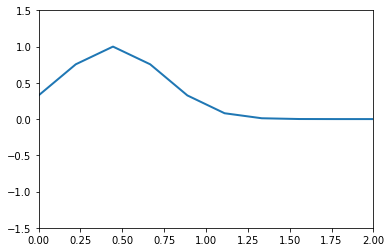

In [29]:
nt = 10
T = 1
nx = 10
l = 2
omega = 1

def animate(data):
    x = np.linspace(0,l,nx)
    y = data
    line.set_data(x,y)
    return line,

fig = plt.figure()
ax = plt.axes(xlim=(0,l),ylim=(-1.5,1.5))
line, = ax.plot([],[],lw=2)


y = wave(fun, dfun, nt, T, nx, l, omega)
anim0 = animation.FuncAnimation(fig,animate,frames=y,interval=1)
plt.show()



In [31]:
HTML(anim0.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available